In [1]:
from skimage.io import imread, imsave
import pyclesperanto_prototype as cle
import pandas as pd
import numpy as np
import apoc

cle.select_device('RTX')

<NVIDIA GeForce RTX 3050 Ti Laptop GPU on Platform: NVIDIA CUDA (1 refs)>

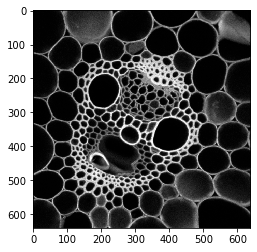

In [2]:
#maize_clsm.tif was taken from
#https://github.com/dlegland/mathematical_morphology_with_MorphoLibJ/blob/master/sampleImages/maize_clsm.tif
#Licensed by David Legland under CC-BY 4.0 license
#https://github.com/dlegland/mathematical_morphology_with_MorphoLibJ/blob/master/LICENSE   
image = cle.push(imread('maize_clsm.tif'))

cle.imshow(image)

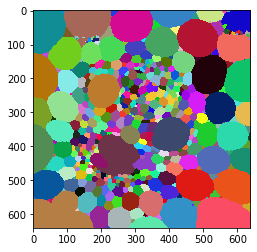

In [3]:
inverted = cle.subtract_image_from_scalar(image, scalar=256)
binary = cle.threshold_otsu(inverted)
labels = cle.connected_components_labeling_box(binary)
extended_labels = cle.extend_labeling_via_voronoi(labels)

cle.imshow(extended_labels, labels=True)

In [4]:
imsave("maize_clsm_labels.tif", np.asarray(extended_labels))

C:\Users\rober\AppData\Local\Temp\ipykernel_3556\134938585.py:1: UserWarning: maize_clsm_labels.tif is a low contrast image
  imsave("maize_clsm_labels.tif", np.asarray(extended_labels))


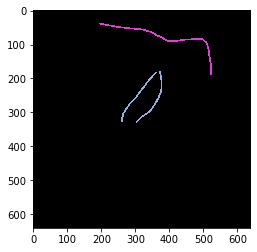

In [5]:
annotation = cle.push(imread('maize_clsm_annotation.tif'))

cle.imshow(annotation, labels=True)

2.0
1.0


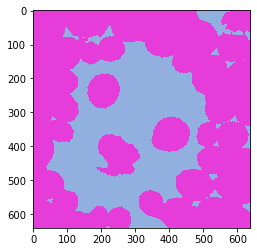

In [6]:
features = 'area,touching_neighbor_count,average_distance_of_touching_neighbors,average_distance_of_n_nearest_neighbors=1,average_distance_of_n_nearest_neighbors=6,average_distance_of_n_nearest_neighbors=10'

cl_filename = "maize_clsm.model.cl"
apoc.erase_classifier(cl_filename)
classifier = apoc.ObjectClassifier(cl_filename)
classifier.train(features, extended_labels, annotation, image)

# apply classifier
result = classifier.predict(labels=extended_labels, image=image)

print(result.max())
print(result.min())

cle.imshow(result, labels=True)

2.0
1.0


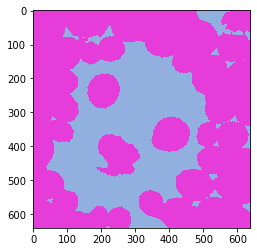

In [7]:
# now we reload the classifier from disc:
classifier = apoc.ObjectClassifier("maize_clsm.model.cl")

result = classifier.predict(labels=extended_labels, image=image)

print(result.max())
print(result.min())

cle.imshow(result, labels=True)